# Deep Learning
# DL10 Capa Maxpool-SOLUCION


## <font color='blue'>**Capa de  Maxpooling**</font>
<p style='text-align: justify;'>

En este notebook, agregamos y visualizamos la salida de una capa Maxpooling en una CNN.

Una capa convolucional + función de activación, seguida de una capa maxpooling y una capa lineal (para crear un tamaño de salida deseado) forman las capas básicas de una CNN.


![OverFitting](https://drive.google.com/uc?export=view&id=1fq1TSTon7SLKPvZdkgVDR0xRC_LCqATM) 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importando la imagen.

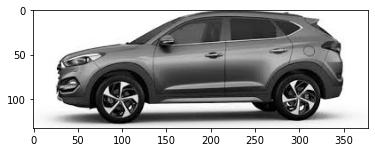

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# la ruta de la imagen.
img_path = '/content/drive/MyDrive/07_DeepLearning/files/Auto.jfif'

# Cargandola. 
bgr_img = cv2.imread(img_path)
# Convirtiendola a escala de gris. 
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# Normalizando. 
gray_img = gray_img.astype("float32")/255

# Dibujando.
plt.imshow(gray_img, cmap='gray')
plt.show()

### Defina y visurlice los filtros. 

In [3]:
import numpy as np

## Definamos un filtro convolucional. 
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)


Filter shape:  (4, 4)


In [4]:
# Generemos variaciones del filtro.

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Veamos un filtro cualquiera. 
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


### Defina las capas convolucionales y pooling. 

A continuacion vamos a ver una Pooling layer

Una capa de Maxpooling reduce el tamaño x-y de una entrada y solo mantiene los valores de píxel más *activos*. A continuación se muestra un ejemplo de un kernel de agrupación de 2x2, con un stride de 2, aplicado a un pequeño parche de valores de píxeles en escala de grises; reduciendo el tamaño x-y del parche en un factor de 2. Solo los valores máximos de píxeles en 2x2 permanecen en la nueva salida agrupada.

![OverFitting](https://drive.google.com/uc?export=view&id=1sJjTi6B7U8KS2LLIBzv9opHiFEqKfkzl) 



In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# Definamos nuestra red convolucional con una capa de maxpooling de tamaño (2,2). 

class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # inicializa los pesos de la capa convolucional para que tengan la forma de los pesos de los 4 filtros definidos
        k_height, k_width = weight.shape[2:]
        # Define 4 filtros. 
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        # ASigna los pesos con los filtros definidos por weight. 
        self.conv.weight = torch.nn.Parameter(weight)
        # Y definimos una Maxpool de 2x2. 
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        
        # returnamos Todas las capas.
        return conv_x, activated_x, pooled_x
    
# Instanciamos model asignando los pesos. 
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


## <font color='green'>**Actividad 8**</font>

En esta actividad utilizaremos el codigo construido en el notebook 8_Filtros_COnvolucionales.ipynb para visualizar la salida de las capas masx pool.

### Visualicemos la salida. 
Definimos la funcion que permite visualizar. 

In [6]:
# función auxiliar para visualizar la salida de una capa determinada
# el número predeterminado de filtros es 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

Veamos el resultado de una capa convolucional después de aplicar una función de activación ReLu.

#### ReLu activation
![OverFitting](https://drive.google.com/uc?export=view&id=1gWJkNE9ohn0mR6EbKTCNNvIECt7Ko8Hl) 




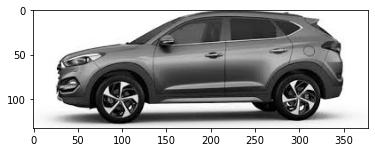

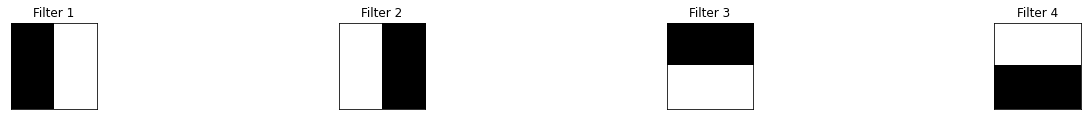

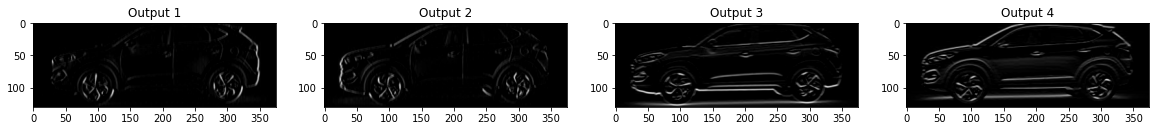

In [7]:
# La imagen original. 
plt.imshow(gray_img, cmap='gray')

# Los filtros. 
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# Convirtiendo a un tensor. 
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# Obteniendo los resultados de las capas. 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# Visualizando la capa activada con Relu. 
viz_layer(activated_layer)

### Visualizando la salida de la capa maxpooling. 

Then, take a look at the output of a pooling layer. The pooling layer takes as input the feature maps pictured above and reduces the dimensionality of those maps, by some pooling factor, by constructing a new, smaller image of only the maximum (brightest) values in a given kernel area.

Take a look at the values on the x, y axes to see how the image has changed size.

La capa de pooling toma como entrada las  características que se muestran arriba y reduce la dimensionalidad de ellas, por algún factor de agrupación, al construir una imagen nueva y más pequeña de solo los valores máximos (más brillantes) en un área de kernel dada.

Eche un vistazo a los valores en los ejes x, y para ver cómo la imagen ha cambiado de tamaño.



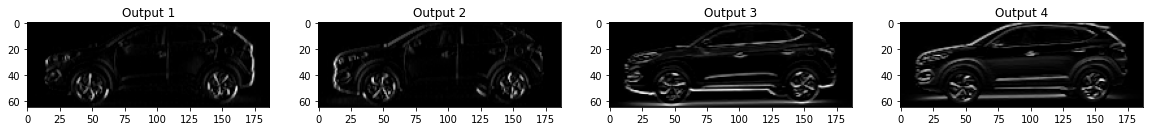

In [8]:
viz_layer(pooled_layer)

<font color='green'>**Fin Actividad 8**</font>